# Ejercicio: campaña de marketing bancario

In [160]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [132]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

No hay valores nulos

In [134]:
df.duplicated().sum()

np.int64(12)

12 valores duplicados, los eliminamos.

In [135]:
df = df.drop_duplicates()

In [136]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [137]:
df.describe(include=['object'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10419,24921,12164,32577,21571,33938,26135,13767,8618,35551,36537


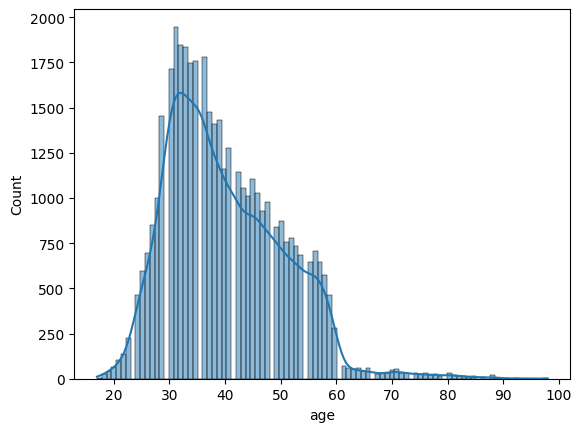

In [138]:
sns.histplot(df['age'], kde=True)
plt.show()

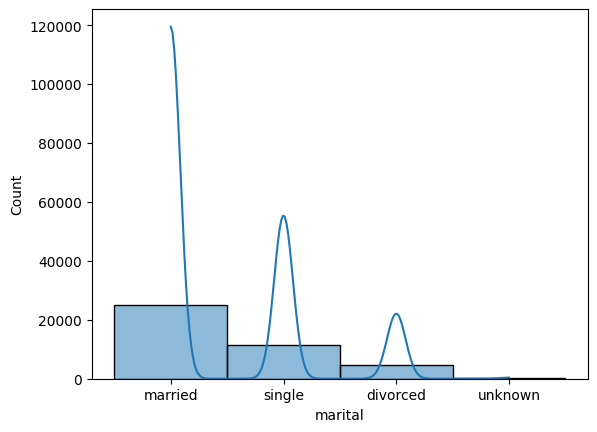

In [139]:
sns.histplot(df['marital'], kde=True)
plt.show()

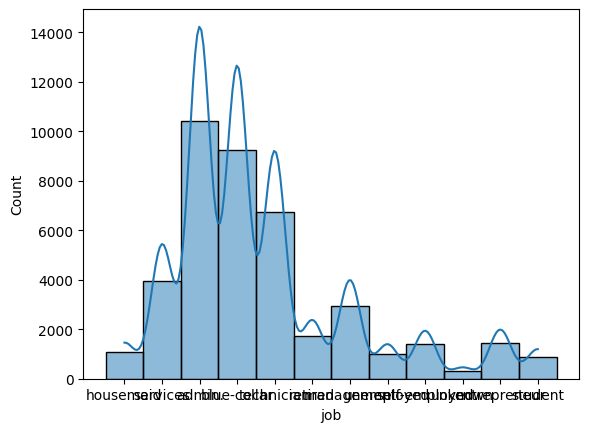

In [140]:
sns.histplot(df['job'], kde=True)
plt.show()

Para ver la correlacion que tienen las variables con la variable objtetivo primero tenemos que convertir las categoricas. ADemás haremos la normalización.

In [141]:
# df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'], drop_first=True)
# df.head()

Con get_dummies obtenía demasiadas variables nuevas, mejor usar pd.factorize que nos da 2 variables: 1 un array con los números enteros correspondientes a cada valor categórico (lo que necesitamos) y 2 otro array con las categorías originales cuyos índices es el número relacionado mediante factorize.

In [142]:
df["job_n"] = pd.factorize(df["job"])[0]
df["marital_n"] = pd.factorize(df["marital"])[0]
df["education_n"] = pd.factorize(df["education"])[0]
df["default_n"] = pd.factorize(df["default"])[0]
df["housing_n"] = pd.factorize(df["housing"])[0]
df["loan_n"] = pd.factorize(df["loan"])[0]
df["contact_n"] = pd.factorize(df["contact"])[0]
df["month_n"] = pd.factorize(df["month"])[0]
df["day_of_week_n"] = pd.factorize(df["day_of_week"])[0]
df["poutcome_n"] = pd.factorize(df["poutcome"])[0]
df["y_n"] = pd.factorize(df["y"])[0]

In [143]:
X = df.drop(['y_n','job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y'], axis = 1)
y = df["y_n"]

In [144]:
X.dtypes

age                 int64
duration            int64
campaign            int64
pdays               int64
previous            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
job_n               int64
marital_n           int64
education_n         int64
default_n           int64
housing_n           int64
loan_n              int64
contact_n           int64
month_n             int64
day_of_week_n       int64
poutcome_n          int64
dtype: object

Separación y escalado de las variables

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaler = StandardScaler()

# X_train_scaled = scaler.fit_transform(X_train)

# X_test_scaled = scaler.transform(X_test)
# Cambio a minmaxscaler porque con standarscaler tenemos valores negativos (entorno a la media estadar, 0) y me da error a la hora de seleccionar las mejores variables

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [150]:
nom_variables = ["job_n", "marital_n", "education_n", "default_n", "housing_n", "loan_n", "contact_n", "month_n", "day_of_week_n", "poutcome_n",
                 "age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]
X_train_scaled = pd.DataFrame(X_train_scaled, index = X_train.index, columns = nom_variables)
X_test_scaled = pd.DataFrame(X_test_scaled, index = X_test.index, columns = nom_variables)


In [152]:
X_train_scaled.head()

,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
12348,0.148148,0.058154,0.036364,1.0,0.0,1.000000,0.669135,0.338912,0.980503,1.000000,0.909091,0.000000,0.285714,0.0,0.5,0.5,0.0,0.222222,1.00,0.0
8565,0.407407,0.036194,0.090909,1.0,0.0,1.000000,0.882307,0.376569,0.958966,1.000000,0.181818,0.333333,0.857143,0.0,0.0,0.0,0.0,0.111111,0.50,0.0
21424,0.148148,0.020943,0.054545,1.0,0.0,1.000000,0.484412,0.615063,0.981410,1.000000,0.181818,0.333333,0.857143,0.0,0.0,0.0,1.0,0.333333,0.25,0.0
3316,0.222222,0.027450,0.000000,1.0,0.0,0.937500,0.698753,0.602510,0.958059,0.859735,0.181818,0.333333,0.857143,0.0,0.0,0.0,0.0,0.000000,0.75,0.0
33246,0.283951,0.084994,0.000000,1.0,0.0,0.333333,0.269680,0.192469,0.148946,0.512287,0.272727,0.333333,0.142857,0.5,0.0,0.0,1.0,0.000000,0.25,0.0


Selección de las variables más influyentes. Metiendo todas las variables se obtiene una precisión de 0,67.

In [154]:
selection_model = SelectKBest(chi2, k = 5)
selection_model.fit(X_train_scaled, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train_scaled), columns = X_train_scaled.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_scaled), columns = X_test_scaled.columns.values[ix])

X_train_sel.head()

,housing_n,loan_n,day_of_week_n,poutcome_n,nr.employed
0,0.0,1.000000,0.980503,1.000000,0.0
1,0.0,1.000000,0.958966,1.000000,0.0
2,0.0,1.000000,0.981410,1.000000,0.0
3,0.0,0.937500,0.958059,0.859735,0.0
4,0.0,0.333333,0.148946,0.512287,0.0


Las variables que ha escogido el modelo son: housing_n	loan_n	day_of_week_n	poutcome_n	nr.employed. Estas variables me suenan un poco extrñas para ser las que más influyan sobre todo la variable dia de la semana.

Construcción del modelo

In [157]:
model = LogisticRegression(max_iter=1000)

model.fit(X_train_sel, y_train)

LogisticRegression(max_iter=1000)

Predicción

In [158]:
y_pred = model.predict(X_test_sel)

Precisión

In [159]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8886595434677028
Confusion Matrix:
 [[7198   67]
 [ 850  121]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94      7265
           1       0.64      0.12      0.21       971

    accuracy                           0.89      8236
   macro avg       0.77      0.56      0.57      8236
weighted avg       0.86      0.89      0.85      8236



Optimización del modelo

In [161]:
# Definimos los parámetros que queremos ajustar a mano
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# Inicializamos la cuadrícula
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [163]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train_sel, y_train)

print(f"Mejores hiperparámetros: {grid.best_params_}")

Mejores hiperparámetros: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


In [164]:
model_grid = LogisticRegression(penalty = "l2", C = 0.1, solver = "newton-cg")
model_grid.fit(X_train_sel, y_train)
y_pred = model_grid.predict(X_test_sel)

grid_accuracy = accuracy_score(y_test, y_pred)
grid_accuracy

0.8901165614375911

Con la optimización de cuadrícula hemos conseguido aumentar en 1% la precisión. 

Hemos obtenido un modelo de regresión logística para predecir si un cliente contratará o no un depósito a largo plazo con una precisión del 89%